# How to Use Statistical Significance Tests to Interpret Machine Learning Results

In [5]:
%matplotlib inline
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas,xgboost

Tue Jul 03 2018 

CPython 3.6.5
IPython 6.4.0

numpy 1.14.5
scipy 1.1.0
sklearn 0.19.1
pandas 0.23.1
xgboost 0.72

compiler   : GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)
system     : Darwin
release    : 17.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [1]:
from numpy.random import seed
from numpy.random import normal
from numpy import savetxt
# define underlying distribution of results
mean = 50
stev = 10
# generate samples from ideal distribution
seed(1)
results = normal(mean, stev, 1000)
# save to ASCII file
savetxt('data/results1.csv', results)

In [3]:
# define underlying distribution of results
mean = 60
stev = 10
# generate samples from ideal distribution
seed(1)
results = normal(mean, stev, 1000)
# save to ASCII file
savetxt('data/results2.csv', results)

                 A            B
count  1000.000000  1000.000000
mean     50.388125    60.388125
std       9.814950     9.814950
min      19.462356    29.462356
25%      43.998396    53.998396
50%      50.412926    60.412926
75%      57.039989    67.039989
max      89.586027    99.586027


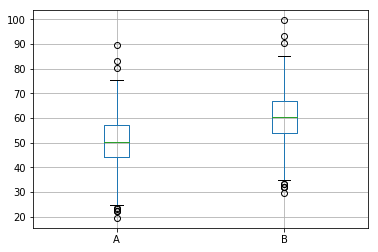

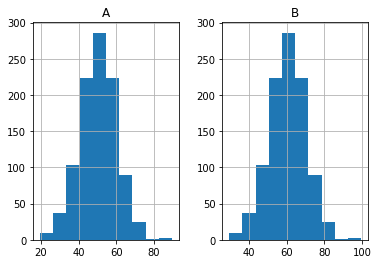

In [6]:
import pandas as pd
from matplotlib import pyplot
# load results file
results = pd.DataFrame()
results['A'] = pd.read_csv('data/results1.csv', header=None).values[:, 0]
results['B'] = pd.read_csv('data/results2.csv', header=None).values[:, 0]
# descriptive stats
print(results.describe())
# box and whisker plot
results.boxplot()
pyplot.show()
# histogram
results.hist()
pyplot.show()

## Normality Test

In [9]:
import pandas as pd
from scipy.stats import normaltest
from matplotlib import pyplot
result1 = pd.read_csv('data/results1.csv', header=None)
value, p = normaltest(result1.values[:,0])
print(value, p)
if p >= 0.05:
    print('It is likely that result1 is normal')
else:
    print('It is unlikely that result1 is normal')

2.9901307811630056 0.22423394146329587
It is likely that result1 is normal


In [10]:
from scipy.stats import normaltest
from matplotlib import pyplot
result2 = pd.read_csv('data/results2.csv', header=None)
value, p = normaltest(result2.values[:,0])
print(value, p)
if p >= 0.05:
    print('It is likely that result2 is normal')
else:
    print('It is unlikely that result2 is normal')

2.9901307811630233 0.2242339414632938
It is likely that result2 is normal


## Compare Means for Gaussian Results with Equal Variance

In [12]:
from pandas import read_csv
from scipy.stats import ttest_ind
from matplotlib import pyplot
# load results1
result1 = read_csv('data/results1.csv', header=None)
values1 = result1.values[:,0]
# load results2
result2 = read_csv('data/results2.csv', header=None)
values2 = result2.values[:,0]
# calculate the significance
value, pvalue = ttest_ind(values1, values2, equal_var=True)
print(value, pvalue)
if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

-22.78226550283975 2.5159901708040968e-102
Samples are likely drawn from different distributions (reject H0)


## Compare Means for Gaussian Results with Different Variance

In [14]:
from numpy.random import seed
from numpy.random import normal
from scipy.stats import ttest_ind
# generate results
seed(1)
n = 100
values1 = normal(50, 1, n)
values2 = normal(51, 10, n)
# calculate the significance
value, pvalue = ttest_ind(values1, values2, equal_var=False)
print(value, pvalue)
if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

-2.6223313740555843 0.010087148378339763
Samples are likely drawn from different distributions (reject H0)


/Users/patornute/.pyenv/versions/3.6.5/envs/latest/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/patornute/.pyenv/versions/3.6.5/envs/latest/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


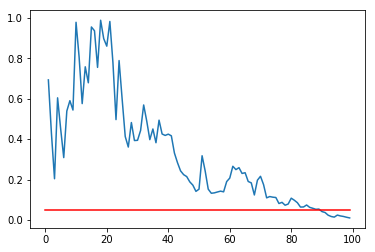

In [15]:
from numpy.random import seed
from numpy.random import normal
from scipy.stats import ttest_ind
from matplotlib import pyplot
# generate results
seed(1)
n = 100
values1 = normal(50, 1, n)
values2 = normal(51, 10, n)
# calculate p-values for different subsets of results
pvalues = list()
for i in range(1, n+1):
	value, p = ttest_ind(values1[0:i], values2[0:i], equal_var=False)
	pvalues.append(p)
# plot p-values vs number of results in sample
pyplot.plot(pvalues)
# draw line at 95%, below which we reject H0
pyplot.plot([0.05 for x in range(len(pvalues))], color='red')
pyplot.show()

We would expect the p-value to get smaller with the increase sample size. We can also draw a line at the 95% level (0.05) and show at what point the sample size is large enough to indicate these two populations are significantly different.

## Compare Means for Non-Gaussian Results

We cannot use the Student t-test or the Welch’s t-test if our data is not Gaussian.

An alternative statistical significance test we can use for non-Gaussian data is called the Kolmogorov-Smirnov test.

0.47 2.1682585673653708e-10
Samples are likely drawn from different distributions (reject H0)


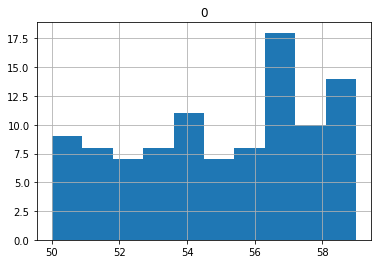

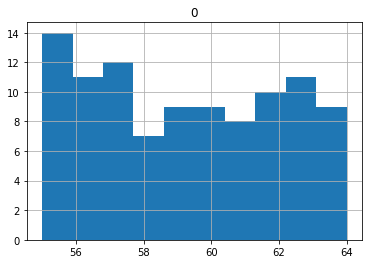

In [22]:
from numpy.random import seed
from numpy.random import randint
from scipy.stats import ks_2samp
# generate results
seed(1)
n = 100
values1 = randint(50, 60, n)
values2 = randint(55, 65, n)
pd.DataFrame(values1).hist()
pd.DataFrame(values2).hist()
# calculate the significance
value, pvalue = ks_2samp(values1, values2)
print(value, pvalue)
if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')